In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('DATA/train.csv')
df_test = pd.read_csv('DATA/test.csv')

# 0) Understand the dataset

In [2]:
df_train.dtypes

id                           int64
short_name                  object
overall                      int64
potential                    int64
value_eur                  float64
                            ...   
goalkeeping_kicking          int64
goalkeeping_positioning      int64
goalkeeping_reflexes         int64
goalkeeping_speed          float64
position                    object
Length: 70, dtype: object

In [3]:
df_train.shape

(6895, 70)

In [4]:
df_train.head()

,id,short_name,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,club_name,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,position
0,216302,E. García,71,71,1400000.0,10000,1989-12-28,176,73,Club Atlético de San Luis,...,65,66,65,14,11,12,12,12,NaN,LB
1,237867,D. Cancola,65,71,1000000.0,2000,1996-10-23,183,73,Ross County FC,...,65,61,58,10,13,7,6,11,NaN,LDM
2,253472,E. Kahl,65,77,1600000.0,2000,2001-09-27,178,69,Aarhus GF,...,60,58,59,10,10,8,10,11,NaN,LWB
3,223994,S. Mugoša,72,72,2300000.0,5000,1992-02-26,188,81,Incheon United FC,...,16,22,19,16,15,13,8,9,NaN,LS
4,251635,A. Țigănașu,65,65,525000.0,3000,1990-06-12,179,74,FC Botoşani,...,64,61,58,12,5,11,12,15,NaN,LB


# 1) Data Preprocessing

Thoroughly clean the FIFA 2022 player dataset, addressing missing values, outliers, and inconsistencies to ensure the accuracy and reliability of subsequent analyses.

## a. Missing Values

In [18]:
train_na_cell = df_train.isnull().sum()
missing_values = train_na_cell[train_na_cell > 0]
print("Columns with missing values:")
print(missing_values)

Columns with missing values:
value_eur                  2
club_loaned_from        6544
club_joined              351
nation_jersey_number    6482
release_clause_eur       353
player_tags             6124
player_traits           2589
pace                     631
shooting                 631
passing                  631
dribbling                631
defending                631
physic                   631
goalkeeping_speed       6264
dtype: int64


## b. Outliers

In [ ]:
# Function to detect outliers based on IQR
def detect_outliers_iqr(df_train, threshold=1.5):
    outlier_columns = []
    for column in df_train.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df_train[column].quantile(0.25)
        Q3 = df_train[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        if ((df_train[column] < lower_bound) | (df_train[column] > upper_bound)).any():
            outlier_columns.append(column)
    return outlier_columns

# Detect columns with outliers
outlier_columns = detect_outliers_iqr(df_train)

# Plot histograms for columns with outliers
for column in outlier_columns:
   if column != 'id':
    sns.histplot(data=df_train, x=column, kde=True)
    plt.title(f'Density Histogram for {column}')
    plt.show()


## c) Inconsistencies

# 2) Feature Engineering

Utilize domain knowledge to craft meaningful new features from the existing dataset, amplifying the predictive power of the model and capturing nuanced player attributes.

## a. Create New Features

## b. Apply New Features in test.csv

# 3) Exploratory Data Analysis

Conduct an in-depth analysis of the most influential features, unveiling correlations between physical attributes and playing positions, guiding feature selection and model development.

## a. Feature Selection

#### i. Numerical Variables

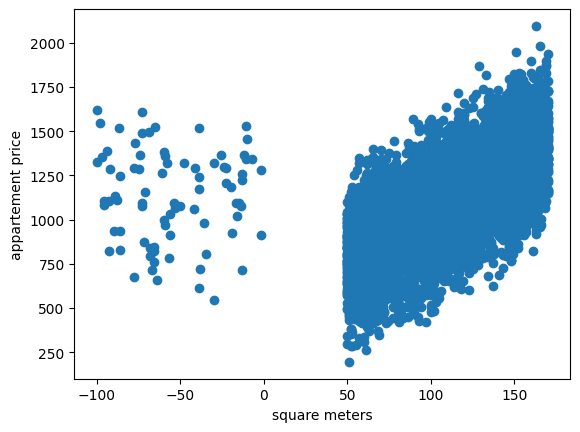

In [82]:
plt.scatter(df_train['square_meters'], df_train['price'])
plt.xlabel('square meters')
plt.ylabel('appartement price')
plt.show()

square_meters vs Price: There is a positive correlation between square_meters and Price, with larger properties generally having higher prices. However, there are some negative values for square_meters, which are likely outliers or data entry errors.

#### ii. Categorical Variables

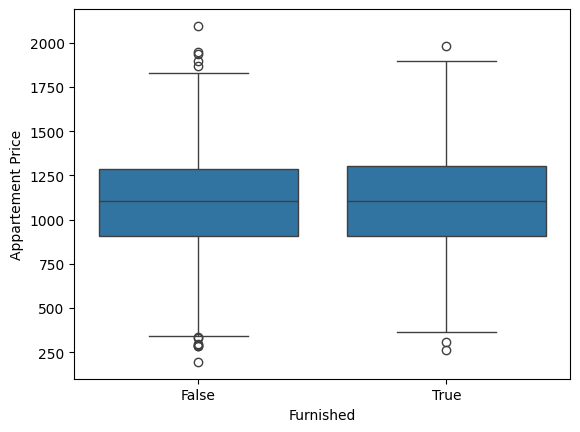

In [86]:
sns.boxplot(data=df_train, x='is_furnished', y='price')
plt.xlabel('Furnished')
plt.ylabel('Appartement Price')
plt.show()

Furnished vs Apartment Price: Median prices are slightly higher for furnished apartments. Both groups have outliers, but there are fewer high-price outliers for furnished apartments.

## b. Insights on Feature Selection

# 4) Cross-Validation Strategy

Implement robust cross-validation techniques to mitigate overfitting and optimize model generalization performance.

# 5) Model Justification

Deploy a minimum of two machine learning models, such as Random Forest and Gradient Boosting, seen in class. Elaborate on the rationale behind each model choice, considering their ability to handle non-linearity, feature interactions, and overall performance.

# 6) Ensemble Modeling

Demonstrate advanced expertise by creating an ensemble model that amalgamates predictions from multiple base models, leveraging the strengths of individual models for improved accuracy and robustness.

# 7) Performance Evaluation

Utilize appropriate evaluation metrics such as accuracy, precision, recall, and F1-score to comprehensively assess the models' classification performance.

# 8) Export